In [ ]:
%pip install pandas
%pip install seaborn
%pip install matplotlib
import pickle as pkl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load/read pickle file

df = pd.DataFrame()
with open("C://Users/testuser/Documents/manningProjects/MeasuringBias/mortgage_data_project_one.pkl", 'rb') as f:
    df = pd.read_pickle(f)

In [3]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165950 entries, 0 to 165949
Data columns (total 78 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   as_of_year                      165950 non-null  int64  
 1   respondent_id                   165950 non-null  object 
 2   agency_name                     165950 non-null  object 
 3   agency_abbr                     165950 non-null  object 
 4   agency_code                     165950 non-null  int64  
 5   loan_type_name                  165950 non-null  object 
 6   loan_type                       165950 non-null  int64  
 7   property_type_name              165950 non-null  object 
 8   property_type                   165950 non-null  int64  
 9   loan_purpose_name               165950 non-null  object 
 10  loan_purpose                    165950 non-null  int64  
 11  owner_occupancy_name            165950 non-null  object 
 12  owner_occupancy 

In [4]:
# calculate frequency of each value in the column 'applicant_ethnicity_name'
# print(df['applicant_ethnicity_name'].value_counts())
ethnicityDF = df['applicant_ethnicity_name'].value_counts()

# convert series to dataframe
ethnicityDF = ethnicityDF.to_frame()
ethnicityDF.head()

# create seaborn barplot




,count
applicant_ethnicity_name,
Not Hispanic or Latino,154805
Hispanic or Latino,11145


In [5]:
print("-----------------------")
print(df['applicant_race_name_1'].value_counts())
print("-----------------------")
print(df['applicant_sex_name'].value_counts())
print("-----------------------")


-----------------------
applicant_race_name_1
White                                        142230
Black or African American                     12726
Asian                                          9119
American Indian or Alaska Native               1225
Native Hawaiian or Other Pacific Islander       650
Name: count, dtype: int64
-----------------------
applicant_sex_name
Male      115246
Female     50704
Name: count, dtype: int64
-----------------------


In [6]:
# print(df['action_taken_name'].value_counts())
actionTakenDF = df['action_taken_name'].value_counts()
actionTakenDF = actionTakenDF.to_frame()
actionTakenDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, Loan originated to Application denied by financial institution
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   2 non-null      int64
dtypes: int64(1)
memory usage: 32.0+ bytes


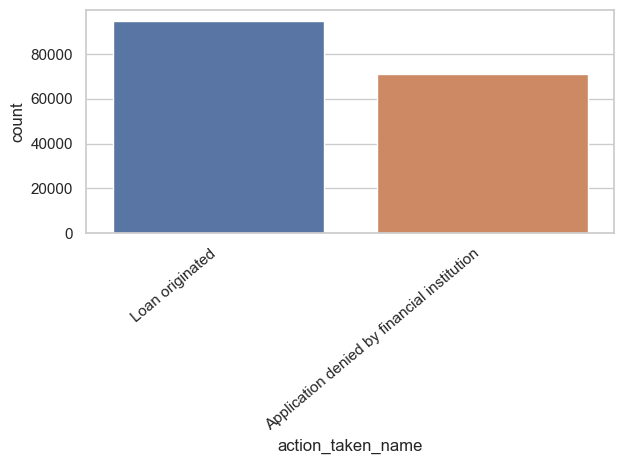

In [7]:
# create seaborn barplot of action_taken_name column
sns.set(style="whitegrid")
ax = sns.barplot(x=actionTakenDF.index, y="count", data=actionTakenDF)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()


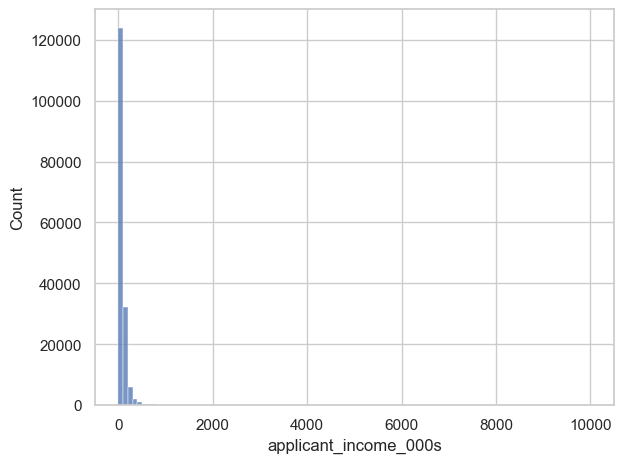

In [10]:
# create seaborn histogram of applicant_income_000s column
sns.set(style="whitegrid")
ax = sns.histplot(data=df, x="applicant_income_000s", bins=100)
plt.tight_layout()
plt.show()


In [9]:
# show range of values in applicant_income_000s column

print(df['applicant_income_000s'].min())
print(df['applicant_income_000s'].max())


1.0
9999.0


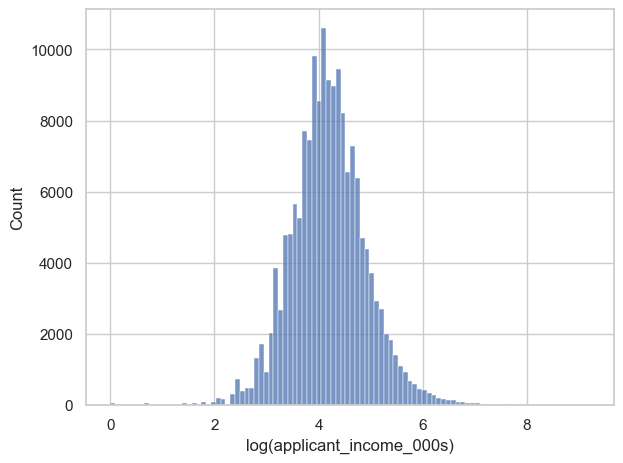

In [18]:
# create new column in df dataframe that is the log of applicant_income_000s
df['log(applicant_income_000s)'] = df['applicant_income_000s'].apply(lambda x: np.log(x))
# df[['applicant_income_000s','log(applicant_income_000s)']].head()

# create seaborn histogram of log(applicant_income_000s) column
sns.set(style="whitegrid")
ax = sns.histplot(data=df, x="log(applicant_income_000s)", bins=100)
plt.tight_layout()
plt.show()



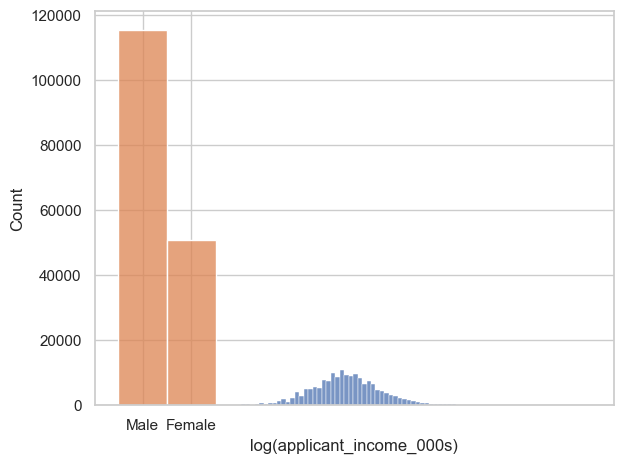

In [19]:
# Use the seaborn package to plot a histogram of log(applicant_income_000s) in relation to applicant_sex_name, overlaying the genders (male and female) in the same plot

# https://www.python-graph-gallery.com/25-histogram-with-several-variables-seaborn

sns.set(style="whitegrid")
ax1 = sns.histplot(data=df, x="log(applicant_income_000s)", bins=100)
ax2 = sns.histplot(data=df, x="applicant_sex_name", bins=100)
plt.tight_layout()
plt.show()



<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, Female to Male
Columns: 1123 entries, 0.0 to 9.21024036697585
dtypes: int64(1123)
memory usage: 17.6+ KB


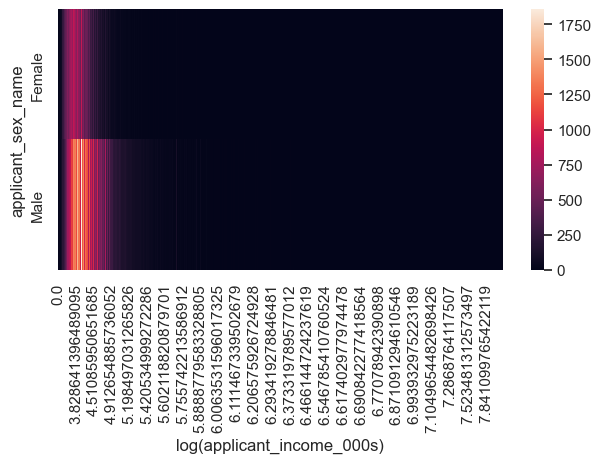

In [24]:
# https://www.geeksforgeeks.org/contingency-table-in-python/
# create contingency table of df['applicant_sex_name] and df['log(applicant_income_000s)']

crossDF = pd.crosstab(index=df['applicant_sex_name'], columns=df['log(applicant_income_000s)'])

crossDF.info()

# create seaborn heatmap of crossDF
sns.set(style="whitegrid")
ax = sns.heatmap(crossDF)
plt.tight_layout()
plt.show()

In [28]:
# create contingency table of df['applicant_ethnicity_name] and df['action_taken_name'])']

cross_eth_DF = pd.crosstab(index=df['applicant_ethnicity_name'], columns=df['action_taken_name'])
cross_eth_DF

action_taken_name,Application denied by financial institution,Loan originated
applicant_ethnicity_name,,
Hispanic or Latino,6748,4397
Not Hispanic or Latino,64265,90540


In [31]:
# create contingency table of df['applicant_race_name_1'] and df['action_taken_name']

cross_race_DF = pd.crosstab(index=df['applicant_race_name_1'], columns=df['action_taken_name'])
cross_race_DF

action_taken_name,Application denied by financial institution,Loan originated
applicant_race_name_1,,
American Indian or Alaska Native,791,434
Asian,3198,5921
Black or African American,9135,3591
Native Hawaiian or Other Pacific Islander,364,286
White,57525,84705


In [65]:
# create contingency table for df['applicant_sex_name'] and df['action_taken_name']

cross_sex_DF = pd.crosstab(index=df['applicant_sex_name'], columns=df['action_taken_name'])
cross_sex_DF.info()
cross_sex_DF['sex'] = cross_sex_DF.index
cross_sex_DF.head()


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, Female to Male
Data columns (total 2 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   Application denied by financial institution  2 non-null      int64
 1   Loan originated                              2 non-null      int64
dtypes: int64(2)
memory usage: 48.0+ bytes


action_taken_name,Application denied by financial institution,Loan originated,sex
applicant_sex_name,,,
Female,25986,24718,Female
Male,45027,70219,Male


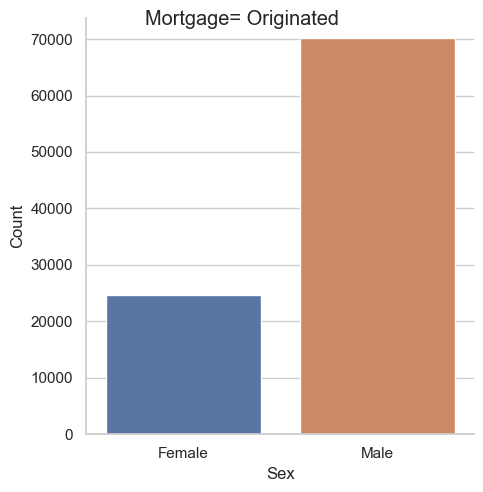

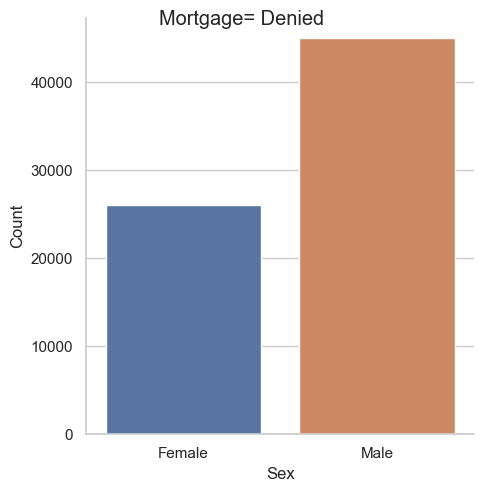

In [85]:
# create categorical plot of contingency table using sns.catplot
# cross_sex_DF['sex'] = cross_sex_DF.index


sns.set(style="whitegrid")

rel1 = sns.catplot( data=cross_sex_DF, x= 'sex', y = 'Loan originated', kind="bar")
rel1.fig.suptitle('Mortgage= Originated')
rel1.set_axis_labels("Sex", "Count")


rel2 = sns.catplot(data=cross_sex_DF, x= 'sex', y = 'Application denied by financial institution', kind="bar")
rel2.fig.suptitle('Mortgage= Denied')
rel2.set_axis_labels("Sex", "Count")
# place sns plots side by side

plt.show()
